In [1]:
import pandas as pd


vehicles_df = pd.read_csv('vehiclecrashdata2021-present.csv')
crashes_df = pd.read_csv('crashdata2021-present.csv')

vehicles_df.head(5)

,CrashName,Name,Sex,Age,Speed,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,OtherAssociatedFactor,VehicleCount,ViolationCode,ViolationCodeDescription
0,CR-0000085197,ACV-0000174389,M,33,NaN,Unknown,Driver,Impairment Not Known,West,Stopped,Car,Unknown,1,Unknown,Unknown
1,CR-0000085197,ACV-0000174390,NaN,0,NaN,Unknown,Driver,Impairment Not Known,West,Making Right Turn,Car,Unknown,1,Unknown,Unknown
2,CR-0000085218,ACV-0000174429,M,19,NaN,Major,Driver,Had Not Been Drinking,East,Proceeding Straight,Car,Speeding,1,23103,Reckless Driving 2
3,CR-0000085218,ACV-0000174430,NaN,0,NaN,Moderate,Parked,Not Applicable,Not Applicable,Parked,Car,Unknown,1,Not Applicable,Not Applicable
4,CR-0000085218,ACV-0000174431,NaN,0,NaN,Moderate,Parked,Not Applicable,Not Applicable,Parked,Car,Unknown,1,Not Applicable,Not Applicable


In [2]:
crashes_df.drop('Comment', axis=1, inplace = True)


#from dateutil import parser

crashes_df['CrashDateTime'] = pd.to_datetime(crashes_df['CrashDateTime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert the datetime objects to a numerical timestamp (Unix timestamp)
crashes_df['CrashDateTime'] = crashes_df['CrashDateTime'].astype('int64') // 10**9

crashes_df.head(5)

,CrashFactId,Name,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,CityDamageFlag,ShortFormFlag,Distance,...,Lighting,PrimaryCollisionFactor,TrafficControl,Weather,CollisionType,ProximityToIntersection,VehicleInvolvedWith,PedestrianDirectionFrom,PedestrianDirectionTo,DirectionFromIntersection
0,649339,CR-0000085219,0,0,0,0,21-002-0253,False,False,285.0,...,Dark - Street Light,Unknown,Controls Functioning,Clear,Rear End,Non-Related,Parked Vehicle,Not Applicable,Not Applicable,South Of
1,649368,CR-0000085220,0,0,0,0,21-001-0325,False,False,51.0,...,Daylight,Unknown,No Controls Present/Factor,Clear,Broadside,Non-Related,Parked Vehicle,Not Applicable,Not Applicable,South Of
2,649369,CR-0000085222,0,0,0,0,21-004-9709,False,True,NaN,...,Daylight,Unknown,Controls Functioning,Clear,Rear End,Related,Other Vehicle,Not Applicable,Not Applicable,South Of
3,649370,CR-0000085225,0,0,0,0,21-002-0483,False,False,0.0,...,Dusk - Dawn,Violation Driver 1,Controls Functioning,Clear,Broadside,Intersection,Other Vehicle,Not Applicable,Not Applicable,At
4,649371,CR-0000085226,0,0,0,0,21-003-4001,False,True,51.0,...,Dusk - Dawn,Unknown,Unknown,Unknown,Other,Non-Related,Parked Vehicle,Not Applicable,Not Applicable,West Of


In [3]:
#joining the dataframes

crashes_df.rename(columns={'Name': 'CrashName'}, inplace=True)
df = pd.merge(crashes_df, vehicles_df, on='CrashName', how='inner')

In [4]:
df.head(5)

,CrashFactId,CrashName,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,CityDamageFlag,ShortFormFlag,Distance,...,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,OtherAssociatedFactor,VehicleCount,ViolationCode,ViolationCodeDescription
0,649339,CR-0000085219,0,0,0,0,21-002-0253,False,False,285.0,...,Unknown,Driver,Impairment Not Known,South,Other Unsafe Turning,Car,Unknown,1,Unknown,Unknown
1,649339,CR-0000085219,0,0,0,0,21-002-0253,False,False,285.0,...,Major,Parked,Not Applicable,Not Applicable,Parked,Car,Unknown,1,Unknown,Unknown
2,649368,CR-0000085220,0,0,0,0,21-001-0325,False,False,51.0,...,Unknown,Driver,Impairment Not Known,West,Backing,Car,Other Violation,1,Unknown,Unknown
3,649368,CR-0000085220,0,0,0,0,21-001-0325,False,False,51.0,...,Moderate,Parked,Not Applicable,Not Applicable,Parked,Car,Unknown,1,Unknown,Unknown
4,649369,CR-0000085222,0,0,0,0,21-004-9709,False,True,NaN,...,Unknown,Driver,Impairment Not Known,North,Proceeding Straight,Car,Unknown,1,Unknown,Unknown


In [5]:
df['PartyType'].unique()

array(['Car', 'Panel Truck', 'Unknown', 'Pedestrian', 'Train', 'Other',
       'Motorcycle/Moped', 'Bicycle', 'Bus - Other',
       'Construction Equipment', 'Scooter Motorized', 'Emergency Vehicle',
       'Scooter Non-Motorized', 'Semi Truck', 'Wheelchair', 'Skateboard',
       'Car With Trailer', 'Bus - School', 'Light Rail Vehicle'],
      dtype=object)

### Filtering for only involving non-motorized parties

In [6]:
party_types_to_check = {'Pedestrian', 'Bicycle', 'Skateboard', 'Wheelchair', 'Scooter Non-Motorized'}

filtered_df = df[df['CrashName'].isin(df[df['PartyType'].isin(party_types_to_check)]['CrashName'])]
filtered_df.head()

,CrashFactId,CrashName,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,TcrNumber,CityDamageFlag,ShortFormFlag,Distance,...,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,OtherAssociatedFactor,VehicleCount,ViolationCode,ViolationCodeDescription
21,649462,CR-0000085229,0,0,1,0,21-003-0753,False,False,150.0,...,Not Applicable,Pedestrian,Impairment Not Known,East,Other (Ped),Pedestrian,Unknown,1,21950,Yield Pedestrian In Crosswalk
22,649462,CR-0000085229,0,0,1,0,21-003-0753,False,False,150.0,...,None,Driver,Had Not Been Drinking,South,Proceeding Straight,Panel Truck,Inattention,1,Not Applicable,Not Applicable
50,649541,CR-0000085246,1,0,0,0,21-004-0636,False,False,27.0,...,None,Driver,Had Not Been Drinking,West,Proceeding Straight,Car,Vision Obscurement,1,21950,Yield Pedestrian In Crosswalk
51,649541,CR-0000085246,1,0,0,0,21-004-0636,False,False,27.0,...,Not Applicable,Pedestrian,Had Not Been Drinking,South,Other (Ped),Pedestrian,None Apparent,1,Not Applicable,Not Applicable
70,649558,CR-0000085260,0,1,0,0,21-006-0684,False,False,523.0,...,Not Applicable,Bicycle,Impairment Not Known,South,Changing Lanes,Bicycle,Other Violation,1,21202,Wrong Way Bike


In [7]:
column_names = df.columns.tolist()
print(column_names)

['CrashFactId', 'CrashName', 'MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries', 'TcrNumber', 'CityDamageFlag', 'ShortFormFlag', 'Distance', 'CrashDateTime', 'PedestrianAction', 'RoadwaySurface', 'RoadwayCondition', 'Lighting', 'PrimaryCollisionFactor', 'TrafficControl', 'Weather', 'CollisionType', 'ProximityToIntersection', 'VehicleInvolvedWith', 'PedestrianDirectionFrom', 'PedestrianDirectionTo', 'DirectionFromIntersection', 'Name', 'Sex', 'Age', 'Speed', 'VehicleDamage', 'PartyCategory', 'Sobriety', 'VehicleDirection', 'MovementPrecedingCollision', 'PartyType', 'OtherAssociatedFactor', 'VehicleCount', 'ViolationCode', 'ViolationCodeDescription']


In [8]:
#drop useless columns:

filtered_df = filtered_df.drop(columns=['TcrNumber', 'CrashFactId', 'CrashName', 'Name', 'ViolationCodeDescription', 'OtherAssociatedFactor'], axis=1)

In [9]:
filtered_df.head()

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,CityDamageFlag,ShortFormFlag,Distance,CrashDateTime,PedestrianAction,RoadwaySurface,...,Age,Speed,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,VehicleCount,ViolationCode
21,0,0,1,0,False,False,150.0,1609704720,Crossing - Not In Crosswalk,Dry,...,36,NaN,Not Applicable,Pedestrian,Impairment Not Known,East,Other (Ped),Pedestrian,1,21950
22,0,0,1,0,False,False,150.0,1609704720,Crossing - Not In Crosswalk,Dry,...,50,NaN,None,Driver,Had Not Been Drinking,South,Proceeding Straight,Panel Truck,1,Not Applicable
50,1,0,0,0,False,False,27.0,1609776840,Crossing In Crosswalk - At Intersection,Dry,...,49,NaN,None,Driver,Had Not Been Drinking,West,Proceeding Straight,Car,1,21950
51,1,0,0,0,False,False,27.0,1609776840,Crossing In Crosswalk - At Intersection,Dry,...,79,NaN,Not Applicable,Pedestrian,Had Not Been Drinking,South,Other (Ped),Pedestrian,1,Not Applicable
70,0,1,0,0,False,False,523.0,1609954500,No Pedestrians Involved,Dry,...,57,NaN,Not Applicable,Bicycle,Impairment Not Known,South,Changing Lanes,Bicycle,1,21202


# Encoded fully:

In [10]:
# dummy encoding
encode_columns=[
    'CityDamageFlag',
    'ShortFormFlag',
    'PedestrianAction',
    'RoadwaySurface',
    'RoadwayCondition',
    'Lighting',
    'PrimaryCollisionFactor',
    'TrafficControl',
    'Weather',
    'CollisionType',
    'VehicleInvolvedWith',
    'ProximityToIntersection',
    'PedestrianDirectionFrom',
    'PedestrianDirectionTo',
    'DirectionFromIntersection',
    'Sex', 
    'VehicleDamage',
    'PartyCategory',
    'Sobriety',
    'VehicleDirection',
    'MovementPrecedingCollision',
    'PartyType',
    'ViolationCode',
    'Speed'
]
df_encoded = pd.get_dummies(filtered_df, columns=encode_columns)

C:\Users\sagit\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


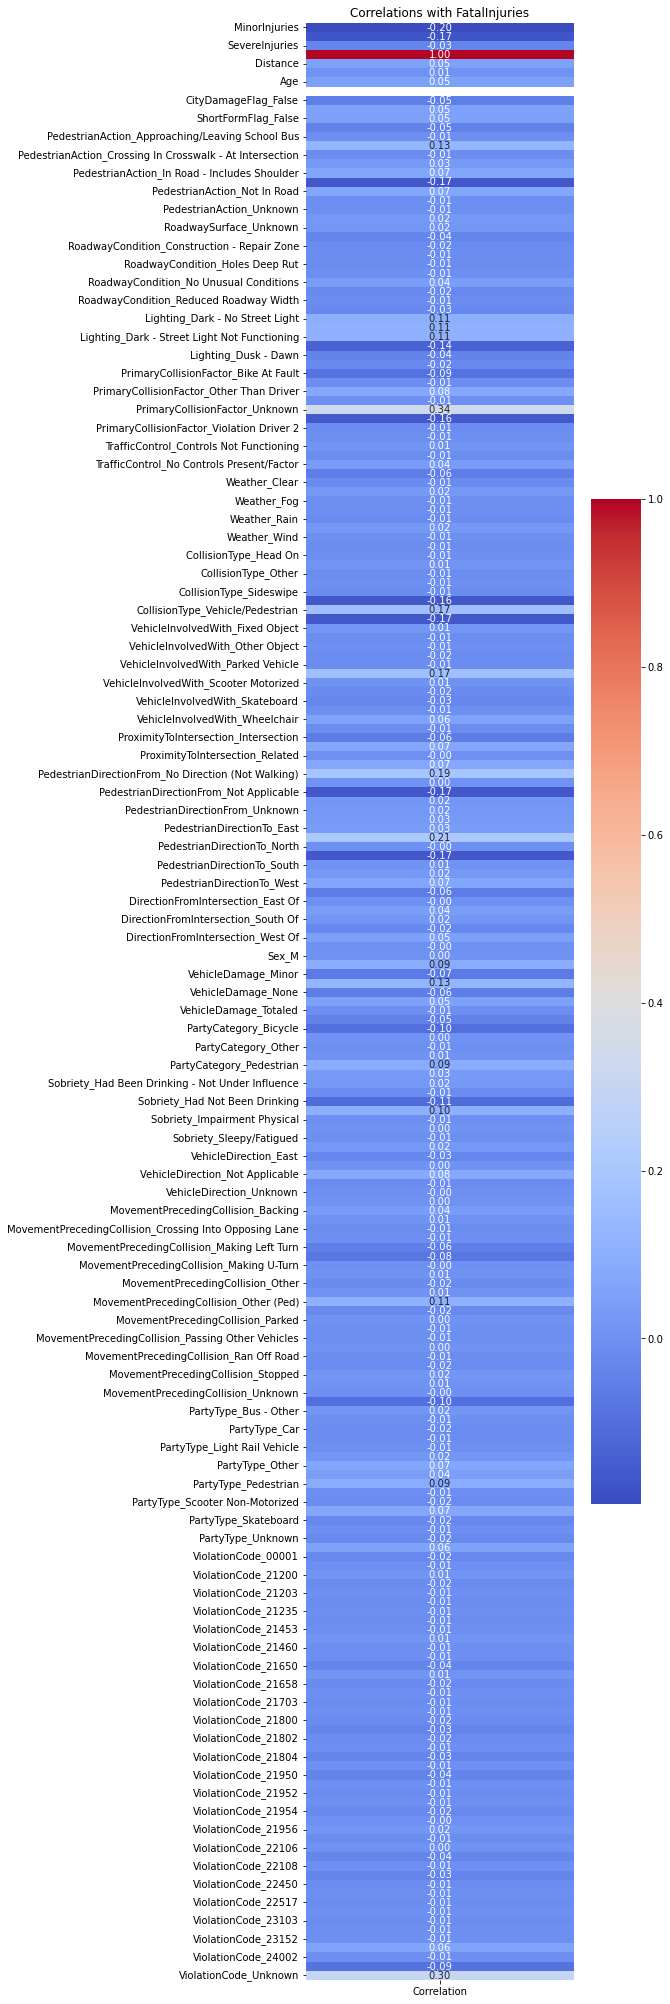

In [11]:
# Correlation to know which to drop from dataset.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for heatmap styling

target_variable = 'FatalInjuries'

correlation_matrix = df_encoded.corrwith(df_encoded[target_variable])
correlation_df = pd.DataFrame({'Correlation': correlation_matrix})

plt.figure(figsize=(6, 36))

# Create the heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Set the title
plt.title(f'Correlations with {target_variable}')

# Show the plot
plt.show()

In [12]:
df_encoded.head(5)

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance,CrashDateTime,Age,VehicleCount,CityDamageFlag_False,CityDamageFlag_True,...,ViolationCode_22500,ViolationCode_22517,ViolationCode_23101,ViolationCode_23103,ViolationCode_23123,ViolationCode_23152,ViolationCode_23153,ViolationCode_24002,ViolationCode_Not Applicable,ViolationCode_Unknown
21,0,0,1,0,150.0,1609704720,36,1,1,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,1,0,150.0,1609704720,50,1,1,0,...,0,0,0,0,0,0,0,0,1,0
50,1,0,0,0,27.0,1609776840,49,1,1,0,...,0,0,0,0,0,0,0,0,0,0
51,1,0,0,0,27.0,1609776840,79,1,1,0,...,0,0,0,0,0,0,0,0,1,0
70,0,1,0,0,523.0,1609954500,57,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Slip dataset

In [13]:
X = df_encoded.drop(columns=['MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries'], axis=1)
y = df_encoded['FatalInjuries'].apply(lambda x: 0 if x == 0 else 1)



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN
X_train = np.nan_to_num(X_train, nan=np.nan, posinf=None, neginf=None)
X_test = np.nan_to_num(X_test, nan=np.nan, posinf=None, neginf=None)

# Check for NaN values and handle them by imputing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    return accuracy, precision, tpr, fpr

# Baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test)

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_metrics = evaluate_model(lda_model, X_test, y_test)

# Logistic Regression model
logreg_model = LogisticRegression(max_iter=100000)
logreg_model.fit(X_train, y_train)
logreg_metrics = evaluate_model(logreg_model, X_test, y_test)

# Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_metrics = evaluate_model(tree_model, X_test, y_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

# Printing the results
models = ['Baseline', 'LDA', 'Logistic Regression', 'Decision Tree', 'Random Forest']
for model, metrics in zip(models, [baseline_metrics, lda_metrics, logreg_metrics, tree_metrics, rf_metrics]):
    print(f"{model} Model:")
    print(f"Accuracy: {metrics[0]:.7f}, Precision: {metrics[1]:.7f}, TPR: {metrics[2]:.7f}, FPR: {metrics[3]:.7f}\n")

Baseline Model:
Accuracy: 0.9407540, Precision: 0.0000000, TPR: 0.0000000, FPR: 0.0000000

LDA Model:
Accuracy: 0.9281867, Precision: 0.4285714, TPR: 0.6363636, FPR: 0.0534351

Logistic Regression Model:
Accuracy: 0.9407540, Precision: 0.0000000, TPR: 0.0000000, FPR: 0.0000000

Decision Tree Model:
Accuracy: 0.9425494, Precision: 0.5161290, TPR: 0.4848485, FPR: 0.0286260

Random Forest Model:
Accuracy: 0.9407540, Precision: 0.0000000, TPR: 0.0000000, FPR: 0.0000000



In the data above, it is clear that the logistic regression model is just predicting the most common answer, just like the baseline. In this case, it is because of oversaturation of non-fatal collisions. I have two approaches to fix this:

# 1. Oversampling:

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Generate a synthetic imbalanced dataset (you can replace this with your own dataset)
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0, n_features=20, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the class distribution before oversampling
print("Class distribution before oversampling:", np.bincount(y_train))

# Oversample the minority class using RandomOverSampler
X_train_resampled, y_train_resampled = resample(X_train[y_train == 1], y_train[y_train == 1],
                                                replace=True, n_samples=X_train[y_train == 0].shape[0],
                                                random_state=42)

# Combine the oversampled minority class with the majority class
X_train_resampled = np.vstack((X_train[y_train == 0], X_train_resampled))
y_train_resampled = np.hstack((y_train[y_train == 0], y_train_resampled))

# Shuffle the combined dataset
rng = np.random.default_rng(42)
indices = np.arange(X_train_resampled.shape[0])
rng.shuffle(indices)
X_train_resampled = X_train_resampled[indices]
y_train_resampled = y_train_resampled[indices]

# Check the class distribution after oversampling
print("Class distribution after oversampling:", np.bincount(y_train_resampled))

# Baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train_resampled, y_train_resampled)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test)

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_resampled, y_train_resampled)
lda_metrics = evaluate_model(lda_model, X_test, y_test)

# Logistic Regression model
logreg_model = LogisticRegression(max_iter=100000)
logreg_model.fit(X_train_resampled, y_train_resampled)
logreg_metrics = evaluate_model(logreg_model, X_test, y_test)

# Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_metrics = evaluate_model(tree_model, X_test, y_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

# Printing the results
models = ['Baseline', 'LDA', 'Logistic Regression', 'Decision Tree', 'Random Forest']
for model, metrics in zip(models, [baseline_metrics, lda_metrics, logreg_metrics, tree_metrics, rf_metrics]):
    print(f"{model} Model:")
    print(f"Accuracy: {metrics[0]:.2f}, Precision: {metrics[1]:.2f}, TPR: {metrics[2]:.2f}, FPR: {metrics[3]:.2f}\n")

Class distribution before oversampling: [ 8 72]
Class distribution after oversampling: [8 8]
Baseline Model:
Accuracy: 0.10, Precision: 0.00, TPR: 0.00, FPR: 0.00

LDA Model:
Accuracy: 0.90, Precision: 0.94, TPR: 0.94, FPR: 0.50

Logistic Regression Model:
Accuracy: 0.95, Precision: 0.95, TPR: 1.00, FPR: 0.50

Decision Tree Model:
Accuracy: 0.95, Precision: 0.95, TPR: 1.00, FPR: 0.50

Random Forest Model:
Accuracy: 0.95, Precision: 0.95, TPR: 1.00, FPR: 0.50



# 2. Redefining the target variable to avoid oversaturation:

In [16]:
# Create a new column that is the weighted sum of the injury columns:
df_encoded_redef = df_encoded.copy()

df_encoded_redef["InjuryIndex"] = df_encoded_redef['MinorInjuries'] + 2 * df_encoded_redef['ModerateInjuries'] + 4 * df_encoded_redef['SevereInjuries'] + 8 * df_encoded_redef['FatalInjuries']


In [17]:
df_encoded_redef.head()

,MinorInjuries,ModerateInjuries,SevereInjuries,FatalInjuries,Distance,CrashDateTime,Age,VehicleCount,CityDamageFlag_False,CityDamageFlag_True,...,ViolationCode_22517,ViolationCode_23101,ViolationCode_23103,ViolationCode_23123,ViolationCode_23152,ViolationCode_23153,ViolationCode_24002,ViolationCode_Not Applicable,ViolationCode_Unknown,InjuryIndex
21,0,0,1,0,150.0,1609704720,36,1,1,0,...,0,0,0,0,0,0,0,0,0,4
22,0,0,1,0,150.0,1609704720,50,1,1,0,...,0,0,0,0,0,0,0,1,0,4
50,1,0,0,0,27.0,1609776840,49,1,1,0,...,0,0,0,0,0,0,0,0,0,1
51,1,0,0,0,27.0,1609776840,79,1,1,0,...,0,0,0,0,0,0,0,1,0,1
70,0,1,0,0,523.0,1609954500,57,1,1,0,...,0,0,0,0,0,0,0,0,0,2


In [18]:
X = df_encoded_redef.drop(columns=['InjuryIndex', 'MinorInjuries', 'ModerateInjuries', 'SevereInjuries', 'FatalInjuries'], axis=1)
y = df_encoded_redef['InjuryIndex']

In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN
X_train = np.nan_to_num(X_train, nan=np.nan, posinf=None, neginf=None)
X_test = np.nan_to_num(X_test, nan=np.nan, posinf=None, neginf=None)

# Check for NaN values and handle them by imputing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    confusion_matrices = []
    
    # Compute confusion matrix for each class
    for class_label in np.unique(y_test):
        class_indices = y_test == class_label
        y_true_class = y_test[class_indices]
        y_pred_class = predictions[class_indices]
        confusion_matrix_class = confusion_matrix(y_true_class, y_pred_class)
        confusion_matrices.append(confusion_matrix_class)
    
    return accuracy, precision, confusion_matrices

# Baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test)

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_metrics = evaluate_model(lda_model, X_test, y_test)

# Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_metrics = evaluate_model(tree_model, X_test, y_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

# Printing the results
models = ['Baseline', 'LDA', 'Decision Tree', 'Random Forest']
for model, metrics in zip(models, [baseline_metrics, lda_metrics, tree_metrics, rf_metrics]):
    print(f"{model} Model:")
    print(f"Accuracy: {metrics[0]:.7f}, Precision: {metrics[1]:.7f}")
    

Baseline Model:
Accuracy: 0.3411131, Precision: 0.1163582
LDA Model:
Accuracy: 0.4111311, Precision: 0.4076688
Decision Tree Model:
Accuracy: 0.4057451, Precision: 0.4063597
Random Forest Model:
Accuracy: 0.4380610, Precision: 0.4528059


## 3. Filtering Data
For further improvements, we could also filter out low correlation data from the set:

In [20]:
correlation_df

,Correlation
MinorInjuries,-0.196642
ModerateInjuries,-0.170503
SevereInjuries,-0.034344
FatalInjuries,1.000000
Distance,0.048366
...,...
ViolationCode_23152,-0.008764
ViolationCode_23153,0.064002
ViolationCode_24002,-0.005058
ViolationCode_Not Applicable,-0.091182


In [21]:
threshold = 0.1

selected_columns = correlation_df[correlation_df['Correlation'].abs() >= threshold].index

In [22]:
# Filter the dataframe based on the mask
filtered_correlation_df = df_encoded[selected_columns]
filtered_correlation_df

,MinorInjuries,ModerateInjuries,FatalInjuries,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_No Pedestrians Involved,Lighting_Dark - No Street Light,Lighting_Dark - Street Light,Lighting_Dark - Street Light Not Functioning,Lighting_Daylight,PrimaryCollisionFactor_Unknown,...,PedestrianDirectionFrom_No Direction (Not Walking),PedestrianDirectionFrom_Not Applicable,PedestrianDirectionTo_No Direction (Not Walking),PedestrianDirectionTo_Not Applicable,VehicleDamage_Moderate,PartyCategory_Bicycle,Sobriety_Had Not Been Drinking,Sobriety_Impairment Not Known,MovementPrecedingCollision_Other (Ped),ViolationCode_Unknown
21,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
22,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
50,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
51,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
70,0,1,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24295,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
24312,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
24313,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
24374,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1


### 3.1 Base models on raw data

In [23]:
X = filtered_correlation_df.drop(columns=['MinorInjuries', 'ModerateInjuries','FatalInjuries'], axis=1)
y = filtered_correlation_df['FatalInjuries'].apply(lambda x: 0 if x == 0 else 1)

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN
X_train = np.nan_to_num(X_train, nan=np.nan, posinf=None, neginf=None)
X_test = np.nan_to_num(X_test, nan=np.nan, posinf=None, neginf=None)

# Check for NaN values and handle them by imputing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    return accuracy, precision, tpr, fpr

# Baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test)

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_metrics = evaluate_model(lda_model, X_test, y_test)

# Logistic Regression model
logreg_model = LogisticRegression(max_iter=100000)
logreg_model.fit(X_train, y_train)
logreg_metrics = evaluate_model(logreg_model, X_test, y_test)

# Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_metrics = evaluate_model(tree_model, X_test, y_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

# Printing the results
models = ['Baseline', 'LDA', 'Logistic Regression', 'Decision Tree', 'Random Forest']
for model, metrics in zip(models, [baseline_metrics, lda_metrics, logreg_metrics, tree_metrics, rf_metrics]):
    print(f"{model} Model:")
    print(f"Accuracy: {metrics[0]:.7f}, Precision: {metrics[1]:.7f}, TPR: {metrics[2]:.7f}, FPR: {metrics[3]:.7f}\n")

Baseline Model:
Accuracy: 0.9407540, Precision: 0.0000000, TPR: 0.0000000, FPR: 0.0000000

LDA Model:
Accuracy: 0.9479354, Precision: 0.5833333, TPR: 0.4242424, FPR: 0.0190840

Logistic Regression Model:
Accuracy: 0.9479354, Precision: 0.6428571, TPR: 0.2727273, FPR: 0.0095420

Decision Tree Model:
Accuracy: 0.9461400, Precision: 0.6153846, TPR: 0.2424242, FPR: 0.0095420

Random Forest Model:
Accuracy: 0.9533214, Precision: 0.8888889, TPR: 0.2424242, FPR: 0.0019084



### 3.2 With Weighted Injury Index:

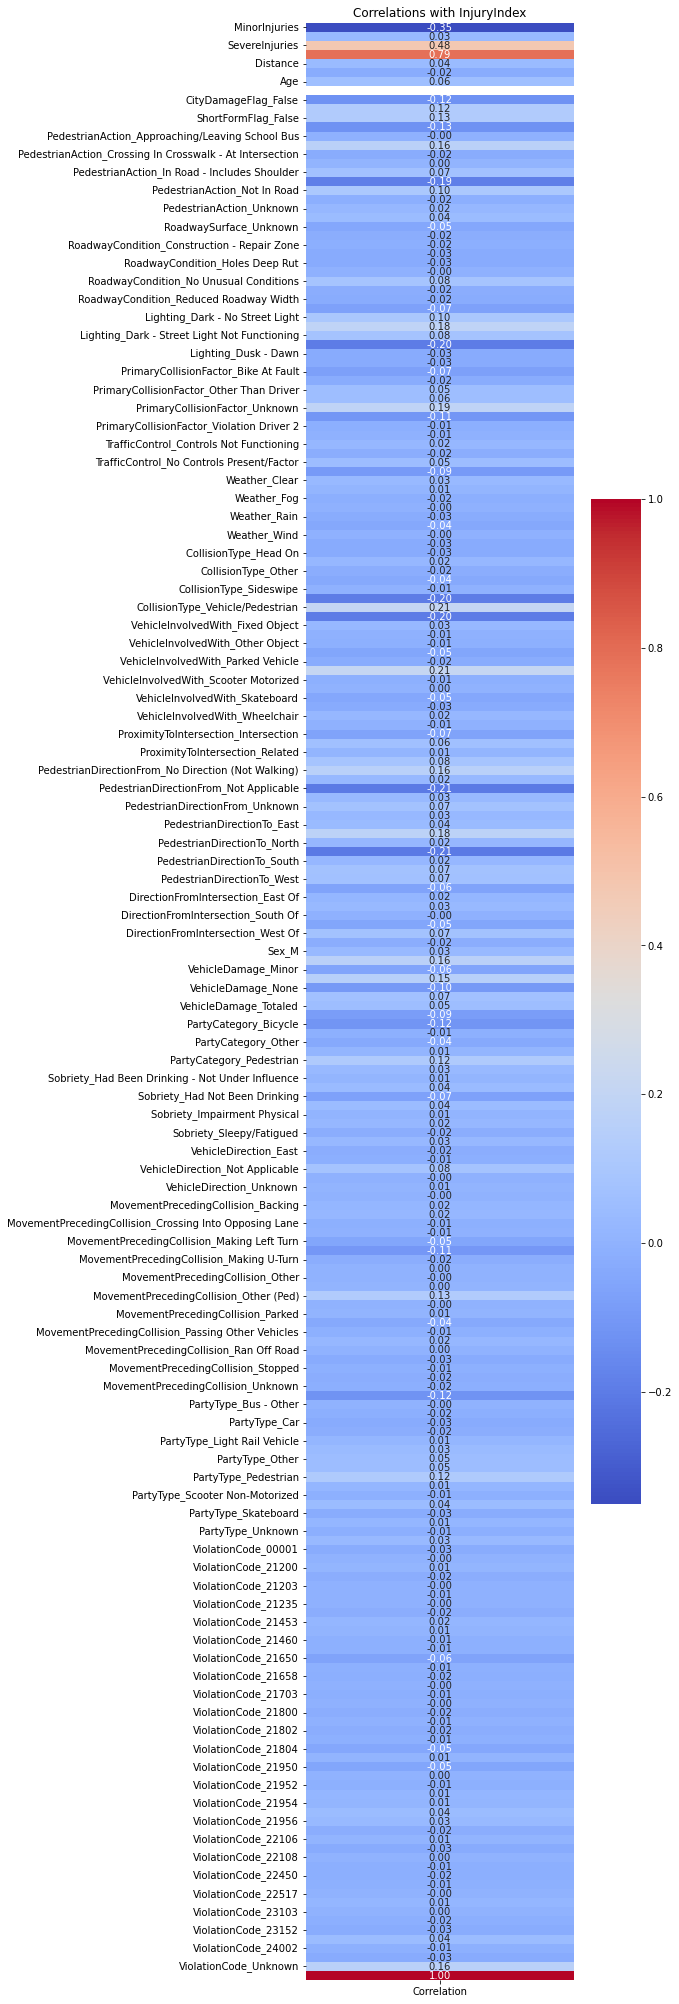

In [25]:
target_variable = 'InjuryIndex'

correlation_matrix = df_encoded_redef.corrwith(df_encoded_redef[target_variable])
correlation_df = pd.DataFrame({'Correlation': correlation_matrix})

plt.figure(figsize=(6, 36))

# Create the heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Set the title
plt.title(f'Correlations with {target_variable}')

# Show the plot
plt.show()

In [26]:
threshold = 0.1

selected_columns = correlation_df[correlation_df['Correlation'].abs() >= threshold].index

# Filter the dataframe based on the mask
filtered_correlation_df_redef = df_encoded_redef[selected_columns]
filtered_correlation_df_redef

,MinorInjuries,SevereInjuries,FatalInjuries,CityDamageFlag_False,CityDamageFlag_True,ShortFormFlag_False,ShortFormFlag_True,PedestrianAction_Crossing - Not In Crosswalk,PedestrianAction_No Pedestrians Involved,PedestrianAction_Not In Road,...,VehicleDamage_Moderate,VehicleDamage_None,PartyCategory_Bicycle,PartyCategory_Pedestrian,MovementPrecedingCollision_Making Right Turn,MovementPrecedingCollision_Other (Ped),PartyType_Bicycle,PartyType_Pedestrian,ViolationCode_Unknown,InjuryIndex
21,0,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,4
22,0,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,4
50,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
51,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
70,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24295,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
24312,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
24313,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
24374,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [27]:
X = filtered_correlation_df_redef.drop(columns=['MinorInjuries', 'SevereInjuries','FatalInjuries'], axis=1)
y = filtered_correlation_df_redef['InjuryIndex']

In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN
X_train = np.nan_to_num(X_train, nan=np.nan, posinf=None, neginf=None)
X_test = np.nan_to_num(X_test, nan=np.nan, posinf=None, neginf=None)

# Check for NaN values and handle them by imputing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    confusion_matrices = []
    
    # Compute confusion matrix for each class
    for class_label in np.unique(y_test):
        class_indices = y_test == class_label
        y_true_class = y_test[class_indices]
        y_pred_class = predictions[class_indices]
        confusion_matrix_class = confusion_matrix(y_true_class, y_pred_class)
        confusion_matrices.append(confusion_matrix_class)
    
    return accuracy, precision, confusion_matrices

# Baseline model
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test)

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_metrics = evaluate_model(lda_model, X_test, y_test)

# Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_metrics = evaluate_model(tree_model, X_test, y_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

# Printing the results
models = ['Baseline', 'LDA', 'Decision Tree', 'Random Forest']
for model, metrics in zip(models, [baseline_metrics, lda_metrics, tree_metrics, rf_metrics]):
    print(f"{model} Model:")
    print(f"Accuracy: {metrics[0]:.7f}, Precision: {metrics[1]:.7f}")
    

Baseline Model:
Accuracy: 0.3411131, Precision: 0.1163582
LDA Model:
Accuracy: 0.3698384, Precision: 0.3857449
Decision Tree Model:
Accuracy: 0.9910233, Precision: 0.9860862
Random Forest Model:
Accuracy: 0.8204668, Precision: 0.8100709
